In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

from collections import Counter

# 1.不均衡数据
- 使用make_classification生成样本数据
- make_classification(n_samples=5000, 
    - n_features=2,  # 特征个数= n_informative（） + n_redundant + n_repeated 
    - n_informative=2,  # 有价值特征的个数
    - n_redundant=0,   # 冗余信息，informative特征的随机线性组合
    - n_repeated=0,  # 重复信息，随机提取n_informative和n_redundant 特征 
    - n_classes=3,  # 分类类别
    - n_clusters_per_class=1,  # 某一个类别是由几个cluster构成的
    - weights=[0.01, 0.05, 0.94],  # 各个类别的占比
    - random_state=0)

In [3]:
X,y = make_classification(n_samples=5000, n_features=2, 
                          n_informative=2, n_redundant=0, 
                          n_repeated=0, n_classes=3, 
                          n_clusters_per_class=1, 
                          weights=[0.01, 0.05, 0.94], random_state=0)
X

array([[ 8.62420206e-01, -9.63476905e-01],
       [-1.38080465e-03, -2.66979396e+00],
       [ 1.40804486e+00, -5.32895046e-01],
       ...,
       [ 1.09447133e+00, -6.99569620e-01],
       [ 1.60312887e+00, -8.26180435e-01],
       [ 1.99589648e+00,  5.42836944e-01]])

In [4]:
X.shape

(5000, 2)

In [5]:
y, y.shape

(array([2, 2, 2, ..., 2, 2, 2]), (5000,))

In [6]:
Counter(y)

Counter({2: 4674, 1: 262, 0: 64})

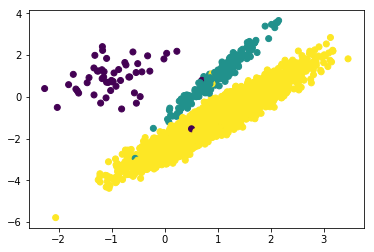

In [7]:
#用 y 值来进行分类,
plt.scatter(x=X[:, 0], y=X[:, 1], c = y)
plt.show()

# 2.如何处理不均衡数据
- 关于类别不平衡的问题，主要有两种处理方式：

- 过采样方法
    - 增加数量较少那一类样本的数量，使得正负样本比例均衡。
- 欠采样方法
    - 减少数量较多那一类样本的数量，使得正负样本比例均衡。

## 2.1 过采样方法
### 2.1 随机过采样
- 随机过采样. 随机过采样顾名思义就是从样本少的类别中随机抽样，再将抽样得来的样本添加到数据集中,这个方法基本已经不用了


- 缺点:
    - 由于需要对少数类样本进行复制来扩大数据集，造成模型训练复杂度加大.
    - 随机过采样是简单的对初始样本进行复制采样，这就使得学习器学得的规则过于具体化，不利于学习器的泛化性能，造成过拟合问题

In [8]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

X_resampled, y_resampled = ros.fit_resample(X, y)

In [9]:
Counter(y_resampled)

Counter({2: 4674, 1: 4674, 0: 4674})

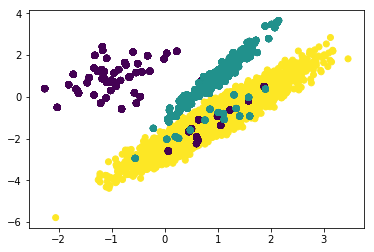

In [10]:
# 数据可视化
plt.scatter(x=X_resampled[:, 0], y=X_resampled[:, 1], c=y_resampled)
plt.show()

### 2.2 SMOTE 过采样算法
![avatar](../source/67.jpg)

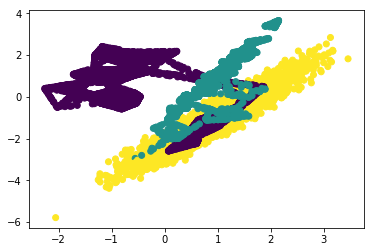

In [11]:
# SMOTE过采样
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
Counter(y_resampled)

# 采样后样本结果
# [(0, 4674), (1, 4674), (2, 4674)]

# 数据集可视化
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled)
plt.show()

## 3.欠采样

直接对训练集中多数类样本进行“欠采样”（undersampling），即去除一些多数类中的样本使得正例、反例数目接近，然后再进行学习。


- 缺点:

随机欠采样方法通过改变多数类样本比例以达到修改样本分布的目的，从而使样本分布较为均衡，但是这也存在一些问题。对于随机欠采样，由于采样的样本集合要少于原来的样本集合，因此会造成一些信息缺失，即将多数类样本删除有可能会导致分类器丢失有关多数类的重要信息。

In [17]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)

X_resampled, y_resampled = rus.fit_resample(X, y)
Counter(y_resampled)

Counter({0: 64, 1: 64, 2: 64})

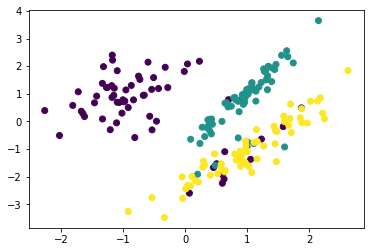

In [18]:
# 数据可视化
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled)
plt.show()